# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import tensorflow as tf
import nltk
from wordcloud import WordCloud

In [2]:
df = pd.read_csv(r'D:\BANGKITACADEMY2023\DATASET\UpdatedResumeDataSet.csv')
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


# EDA

In [3]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

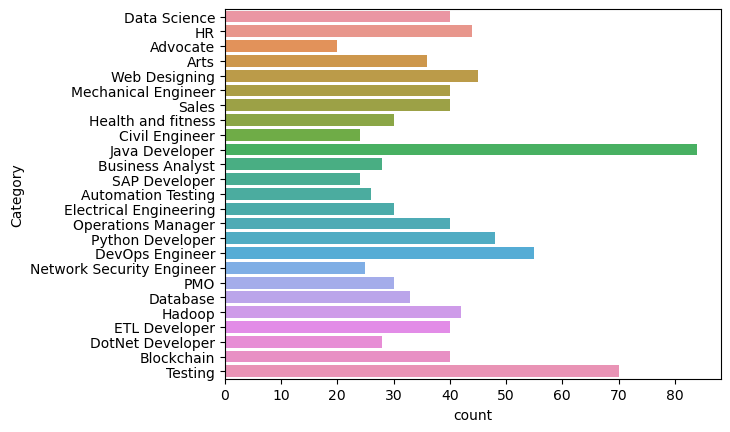

In [4]:
sns.countplot(y="Category", data=df);

In [5]:
job = ['Data Science', 'Web Designing', 'Java Developer', 'Business Analyst', 'Operations Manager', 'DevOps Engineer']

In [6]:
df = df[df['Category'].isin(job)]

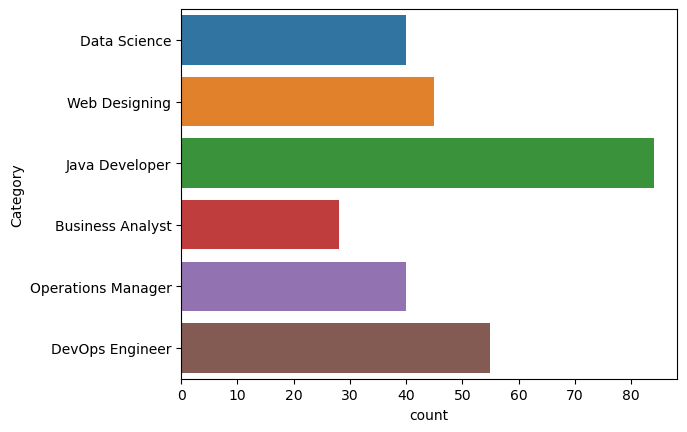

In [7]:
sns.countplot(y="Category", data=df);

# Data Cleaning

In [8]:
# clean the data
def clean_data(data):
    data = data.lower()
    # Remove URLs
    data = re.sub('http\S+\s*', ' ', data)
    # Remove RT and cc
    data = re.sub('RT|cc', ' ', data)
    # Remove hashtags
    data = re.sub('#\S+', '', data)
    # Remove mentions
    data = re.sub('@\S+', ' ', data)
    # Remove punctuations and non-ASCII characters
    data = re.sub('[^a-zA-Z]', ' ', data)
    # Remove extra whitespace
    data = re.sub('\s+', ' ', data)

    return data

In [9]:
df['Resume'] = df['Resume'].apply(clean_data)
df

C:\Users\dion\AppData\Local\Temp\ipykernel_10328\409254544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resume'] = df['Resume'].apply(clean_data)


,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may to may b e uit rgpv data...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...
...,...,...
649,DevOps Engineer,software proficiency languages basics of c sql...
650,DevOps Engineer,core competencies ant maven git bitbucket jenk...
651,DevOps Engineer,skills visa b visa usa onsite visits to sweden...
652,DevOps Engineer,software proficiency languages basics of c sql...


In [10]:
def tokenize(text):
    words = re.split("\W+", text)
    return words

df['resume_split'] = df['Resume'].apply(lambda x: tokenize(x))
df

C:\Users\dion\AppData\Local\Temp\ipykernel_10328\3559892595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resume_split'] = df['Resume'].apply(lambda x: tokenize(x))


,Category,Resume,resume_split
0,Data Science,skills programming languages python pandas num...,"[skills, programming, languages, python, panda..."
1,Data Science,education details may to may b e uit rgpv data...,"[education, details, may, to, may, b, e, uit, ..."
2,Data Science,areas of interest deep learning control system...,"[areas, of, interest, deep, learning, control,..."
3,Data Science,skills r python sap hana tableau sap hana sql ...,"[skills, r, python, sap, hana, tableau, sap, h..."
4,Data Science,education details mca ymcaust faridabad haryan...,"[education, details, mca, ymcaust, faridabad, ..."
...,...,...,...
649,DevOps Engineer,software proficiency languages basics of c sql...,"[software, proficiency, languages, basics, of,..."
650,DevOps Engineer,core competencies ant maven git bitbucket jenk...,"[core, competencies, ant, maven, git, bitbucke..."
651,DevOps Engineer,skills visa b visa usa onsite visits to sweden...,"[skills, visa, b, visa, usa, onsite, visits, t..."
652,DevOps Engineer,software proficiency languages basics of c sql...,"[software, proficiency, languages, basics, of,..."


In [11]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dion\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
stopword = nltk.corpus.stopwords.words('english')
list_stopword = ['skills', 'education', 'windows', 'set', 'may', 'january', 'february',
               'march', 'april', 'june', 'july', 'august', 'september', 'october', 'november',
               'december', 'ymcaust', 'fariabad', 'b', 'e', 'uit', 'us', 'other', 'others',
                 'personal', 'languages', 'su', 'o', 'project', 'exprience', 'company', 'month', 'team', 'detail', 'description', 'system', 'application', 'technology', 'year', 'le', 'ltd', 'university',
                           'j', 'ge', 'like', 'also', 'timely', 'per', 'new', 'daily', 'etc', 'size', 'level', 'experience', 'mumbai', 'ee', 'pre', 'text', 'co', 'till',
                           'mi', 'essfully', 'es', 'uat', 'discus', 'v', 'ci', 'no', 'bachelor', 'k', 'v', 'o', 'sla', 'po', 'hmi', 'dubai', 'h', 'pl', 'nashik', 'capgemini', 'aug',
                           'jan', 'feb', 'whenever', 'n', 'xen', 'l', 'u']

stopword.extend(list_stopword)


def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

In [13]:
df['resume_split_stopword'] = df['resume_split'].apply(lambda x: remove_stopwords(x))
df

C:\Users\dion\AppData\Local\Temp\ipykernel_10328\2336363565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resume_split_stopword'] = df['resume_split'].apply(lambda x: remove_stopwords(x))


,Category,Resume,resume_split,resume_split_stopword
0,Data Science,skills programming languages python pandas num...,"[skills, programming, languages, python, panda...","[programming, python, pandas, numpy, scipy, sc..."
1,Data Science,education details may to may b e uit rgpv data...,"[education, details, may, to, may, b, e, uit, ...","[details, rgpv, data, scientist, data, scienti..."
2,Data Science,areas of interest deep learning control system...,"[areas, of, interest, deep, learning, control,...","[areas, interest, deep, learning, control, des..."
3,Data Science,skills r python sap hana tableau sap hana sql ...,"[skills, r, python, sap, hana, tableau, sap, h...","[r, python, sap, hana, tableau, sap, hana, sql..."
4,Data Science,education details mca ymcaust faridabad haryan...,"[education, details, mca, ymcaust, faridabad, ...","[details, mca, faridabad, haryana, data, scien..."
...,...,...,...,...
649,DevOps Engineer,software proficiency languages basics of c sql...,"[software, proficiency, languages, basics, of,...","[software, proficiency, basics, c, sql, sql, j..."
650,DevOps Engineer,core competencies ant maven git bitbucket jenk...,"[core, competencies, ant, maven, git, bitbucke...","[core, competencies, ant, maven, git, bitbucke..."
651,DevOps Engineer,skills visa b visa usa onsite visits to sweden...,"[skills, visa, b, visa, usa, onsite, visits, t...","[visa, visa, usa, onsite, visits, sweden, seat..."
652,DevOps Engineer,software proficiency languages basics of c sql...,"[software, proficiency, languages, basics, of,...","[software, proficiency, basics, c, sql, sql, j..."


## Stemming dan Lemmatization

In [14]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_word(word):
  return [lemmatizer.lemmatize(w) for w in word]

In [15]:
df['resume_split_stopword_lemma'] = df['resume_split_stopword'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df

C:\Users\dion\AppData\Local\Temp\ipykernel_10328\2540017922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resume_split_stopword_lemma'] = df['resume_split_stopword'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


,Category,Resume,resume_split,resume_split_stopword,resume_split_stopword_lemma
0,Data Science,skills programming languages python pandas num...,"[skills, programming, languages, python, panda...","[programming, python, pandas, numpy, scipy, sc...","[programming, python, panda, numpy, scipy, sci..."
1,Data Science,education details may to may b e uit rgpv data...,"[education, details, may, to, may, b, e, uit, ...","[details, rgpv, data, scientist, data, scienti...","[detail, rgpv, data, scientist, data, scientis..."
2,Data Science,areas of interest deep learning control system...,"[areas, of, interest, deep, learning, control,...","[areas, interest, deep, learning, control, des...","[area, interest, deep, learning, control, desi..."
3,Data Science,skills r python sap hana tableau sap hana sql ...,"[skills, r, python, sap, hana, tableau, sap, h...","[r, python, sap, hana, tableau, sap, hana, sql...","[r, python, sap, hana, tableau, sap, hana, sql..."
4,Data Science,education details mca ymcaust faridabad haryan...,"[education, details, mca, ymcaust, faridabad, ...","[details, mca, faridabad, haryana, data, scien...","[detail, mca, faridabad, haryana, data, scienc..."
...,...,...,...,...,...
649,DevOps Engineer,software proficiency languages basics of c sql...,"[software, proficiency, languages, basics, of,...","[software, proficiency, basics, c, sql, sql, j...","[software, proficiency, basic, c, sql, sql, ja..."
650,DevOps Engineer,core competencies ant maven git bitbucket jenk...,"[core, competencies, ant, maven, git, bitbucke...","[core, competencies, ant, maven, git, bitbucke...","[core, competency, ant, maven, git, bitbucket,..."
651,DevOps Engineer,skills visa b visa usa onsite visits to sweden...,"[skills, visa, b, visa, usa, onsite, visits, t...","[visa, visa, usa, onsite, visits, sweden, seat...","[visa, visa, usa, onsite, visit, sweden, seatt..."
652,DevOps Engineer,software proficiency languages basics of c sql...,"[software, proficiency, languages, basics, of,...","[software, proficiency, basics, c, sql, sql, j...","[software, proficiency, basic, c, sql, sql, ja..."


In [16]:
def concat(lst):
    sentence = ' '.join(lst)
    return sentence

df['join_words'] = df['resume_split_stopword_lemma'].apply(concat)
new_df = df[['Category', 'join_words']]
new_df

C:\Users\dion\AppData\Local\Temp\ipykernel_10328\3113930716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['join_words'] = df['resume_split_stopword_lemma'].apply(concat)


,Category,join_words
0,Data Science,programming python panda numpy scipy scikit le...
1,Data Science,detail rgpv data scientist data scientist mate...
2,Data Science,area interest deep learning control design pro...
3,Data Science,r python sap hana tableau sap hana sql sap han...
4,Data Science,detail mca faridabad haryana data science inte...
...,...,...
649,DevOps Engineer,software proficiency basic c sql sql java java...
650,DevOps Engineer,core competency ant maven git bitbucket jenkin...
651,DevOps Engineer,visa visa usa onsite visit sweden seattle deta...
652,DevOps Engineer,software proficiency basic c sql sql java java...


# Augmentasi Data

In [17]:
from collections import Counter
import re

text = "Ini adalah contoh teks. Teks ini digunakan untuk demonstrasi."
cleaned_text = re.findall(r'\b\w+\b', text.lower())

word_count = Counter(cleaned_text)
top_words = word_count.most_common(5)
print(top_words)

[('ini', 2), ('teks', 2), ('adalah', 1), ('contoh', 1), ('digunakan', 1)]


In [18]:
texts = new_df['join_words']

def clean_text(text):
    cleaned_text = re.findall(r'\b\w+\b', text.lower())
    return cleaned_text

word_counts = []
for text in texts:
    cleaned_text = clean_text(text)
    word_count = Counter(cleaned_text)
    word_counts.append(word_count)

combined_word_count = sum(word_counts, Counter())
top_words = combined_word_count.most_common(1000)
print(top_words)

[('month', 1342), ('detail', 976), ('java', 803), ('client', 801), ('service', 754), ('management', 728), ('business', 655), ('customer', 642), ('operation', 633), ('data', 622), ('development', 607), ('requirement', 603), ('process', 579), ('le', 565), ('user', 523), ('developer', 492), ('software', 489), ('technology', 471), ('maharashtra', 464), ('database', 455), ('activity', 454), ('pvt', 449), ('responsibility', 433), ('c', 418), ('server', 405), ('role', 394), ('report', 386), ('script', 361), ('sql', 360), ('using', 354), ('testing', 353), ('work', 344), ('test', 344), ('mysql', 343), ('engineering', 337), ('various', 333), ('ensuring', 330), ('web', 329), ('html', 323), ('information', 323), ('skill', 318), ('india', 318), ('quality', 310), ('support', 309), ('solution', 304), ('technical', 302), ('control', 301), ('meeting', 294), ('tool', 290), ('shell', 285), ('used', 284), ('jquery', 281), ('managing', 281), ('product', 280), ('build', 280), ('working', 274), ('analysis', 

In [19]:
dataword = pd.DataFrame(top_words, columns=['Kata', 'Jumlah Kemunculan'])
dataword

texts = texts.apply(clean_data)
texts = texts.apply(tokenize)
texts = texts.apply(remove_stopwords)
texts = texts.apply(lemmatize_word)
texts = texts.apply(concat)

In [20]:
texts

0      programming python panda numpy scipy scikit le...
1      rgpv data scientist data scientist matelabs sk...
2      area interest deep learning control design pro...
3      r python sap hana tableau sap hana sql sap han...
4      mca faridabad haryana data science internship ...
                             ...                        
649    software proficiency basic c sql sql java java...
650    core competency ant maven git bitbucket jenkin...
651    visa visa usa onsite visit sweden seattle post...
652    software proficiency basic c sql sql java java...
653    core competency ant maven git bitbucket jenkin...
Name: join_words, Length: 292, dtype: object

# Data Splitting

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
text = df['join_words'].values
label = df['Category'].values
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, stratify=label, random_state=42)
text_train.shape, text_test.shape, label_train.shape, label_test.shape

((233,), (59,), (233,), (59,))

In [23]:
new_label = pd.get_dummies(label_train)

In [24]:
new_label.columns

Index(['Business Analyst', 'Data Science', 'DevOps Engineer', 'Java Developer',
       'Operations Manager', 'Web Designing'],
      dtype='object')

# Tokenizer & Padding

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
type(text_train)

numpy.ndarray

In [27]:
type(text_test)

numpy.ndarray

In [28]:
tokenizer = Tokenizer(num_words=2048, oov_token='<OOV>')
tokenizer.fit_on_texts(text_train)

sequence_train = tokenizer.texts_to_sequences(text_train.tolist())
sequence_test = tokenizer.texts_to_sequences(text_test.tolist())

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

In [29]:
padded_train.shape, padded_test.shape

((233, 1296), (59, 1296))

In [30]:
from keras.utils import to_categorical

# Mengubah label menjadi one-hot encoding
label_train_encoded = pd.get_dummies(label_train)
label_test_encoded = pd.get_dummies(label_test)

In [31]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Modeling

## Model 1

In [32]:
import tensorflow as tf

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
            print("\nAkurasi model telah mencapai >90%")
            self.model.stop_training = True
callbacks = MyCallback()

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=2500, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
hist = model.fit(padded_train, label_train_encoded, epochs=100,
                 validation_data=(padded_test, label_test_encoded), verbose=1,
                 callbacks=[callbacks])

Epoch 1/100
8/8 [==============================] - 10s 849ms/step - loss: 1.7861 - accuracy: 0.2704 - val_loss: 1.7726 - val_accuracy: 0.2881
Epoch 2/100
8/8 [==============================] - 6s 754ms/step - loss: 1.7620 - accuracy: 0.2876 - val_loss: 1.7326 - val_accuracy: 0.2881
Epoch 3/100
8/8 [==============================] - 6s 745ms/step - loss: 1.7010 - accuracy: 0.3090 - val_loss: 1.5854 - val_accuracy: 0.4576
Epoch 4/100
8/8 [==============================] - 6s 719ms/step - loss: 1.4915 - accuracy: 0.4592 - val_loss: 1.2711 - val_accuracy: 0.6102
Epoch 5/100
8/8 [==============================] - 6s 769ms/step - loss: 1.2095 - accuracy: 0.5665 - val_loss: 1.0076 - val_accuracy: 0.6102
Epoch 6/100
8/8 [==============================] - 6s 731ms/step - loss: 0.9168 - accuracy: 0.6009 - val_loss: 0.7350 - val_accuracy: 0.6102
Epoch 7/100
8/8 [==============================] - 6s 736ms/step - loss: 0.9402 - accuracy: 0.5622 - val_loss: 0.6050 - val_accuracy: 0.7458
Epoch 8/100


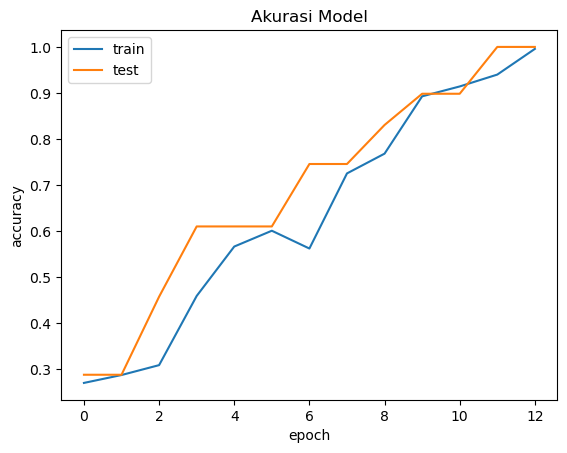

In [34]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

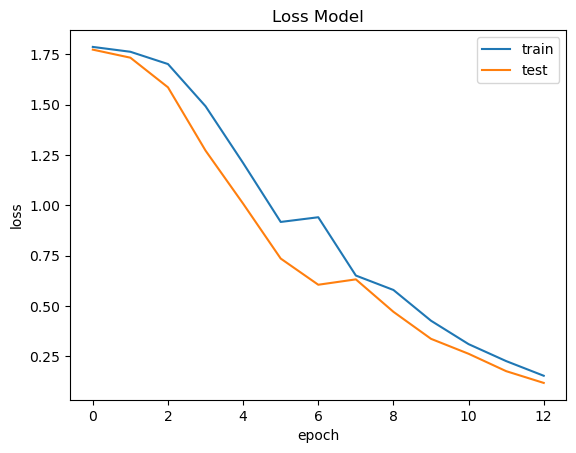

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [36]:
def predict(model, text):
# tokenize, remove_stopword, lemmatize, concat
  text = tokenize(text)
  text = remove_stopwords(text)
  text = lemmatize_word(text)
  text = concat(text)

  sequence = tokenizer.texts_to_sequences([text])
  padded = pad_sequences(sequence)

  pred = model.predict(padded)

  # kategori = ['DevOps Engineer', 'Data Science', 'Business Analyst',
  #      'Web Designing', 'Java Developer', 'Operations Manager']

  kategori = new_label.columns
  print(kategori)

  # Mengambil kategori dengan probabilitas tertinggi untuk setiap baris
  prediction_kategori = [kategori[np.argmax(row)] for row in pred]

  return prediction_kategori, pred

In [37]:
text = "programming python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch j dc j plotly kibana matplotlib ggplot tableau regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep learning detail data science assurance associate data science assurance associate ernst young llp skill detail javascript month jquery month python monthscompany detail ernst young llp fraud investigation dispute service assurance assisted review tar assisted review assist elerating review process run analytics generate report core member helped developing automated review platform tool scratch assisting discovery domain tool implement predictive coding topic modelling automating review resulting reduced labor cost time spent lawyer review understand end end flow solution research development classification model predictive analysis mining information present data worked analyzing output precision monitoring entire tool tar"

In [38]:
predict(model, text)

1/1 [==============================] - 1s 540ms/step
Index(['Business Analyst', 'Data Science', 'DevOps Engineer', 'Java Developer',
       'Operations Manager', 'Web Designing'],
      dtype='object')


(['Data Science'],
 array([[0.01460821, 0.8632063 , 0.00325736, 0.11477129, 0.00100113,
         0.00315572]], dtype=float32))

In [43]:
new_label.columns

Index(['Business Analyst', 'Data Science', 'DevOps Engineer', 'Java Developer',
       'Operations Manager', 'Web Designing'],
      dtype='object')

In [45]:
model.save('classjob.h5')

In [46]:

loaded_model = tf.keras.models.load_model('./classjob.h5')

In [47]:
text = "python mysql"
predict(loaded_model, text)

1/1 [==============================] - 0s 475ms/step
Index(['Business Analyst', 'Data Science', 'DevOps Engineer', 'Java Developer',
       'Operations Manager', 'Web Designing'],
      dtype='object')


(['Business Analyst'],
 array([[0.23556875, 0.17773163, 0.22868206, 0.14122882, 0.10189518,
         0.11489362]], dtype=float32))

In [48]:
new_df[df['Category'] == "Data Science"]

,Category,join_words
0,Data Science,programming python panda numpy scipy scikit le...
1,Data Science,detail rgpv data scientist data scientist mate...
2,Data Science,area interest deep learning control design pro...
3,Data Science,r python sap hana tableau sap hana sql sap han...
4,Data Science,detail mca faridabad haryana data science inte...
5,Data Science,c basic iot python matlab data science machine...
6,Data Science,python tableau data visualization r studio mac...
7,Data Science,detail tech rayat bahra institute engineering ...
8,Data Science,ability quickly grasp technical aspect willing...
9,Data Science,expertise data quantitative analysis decision ...
